# Movie Industry Exploratory Data Analysis

## Objective: Investigate the film industry to gain sufficient understanding of what attributes to success and in turn utilize this analysis to create *actionable* recommendations for companies to enter the industry.

### Importing necessary libraries and the datasets.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import matplotlib.font_manager as fm


In [2]:
#Setting the default style for plots
plt.style.use('ggplot')

from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12,8)

%matplotlib inline

In [3]:
movie_dates_df = pd.read_csv('movie_release_dates.csv', index_col=0)
theaters_df = pd.read_csv('movie_theater_data.csv', index_col=0)
awards_df = pd.read_csv('movie_awards.csv', index_col=0)
actors_df = pd.read_csv('Actors_Table.csv')
directors_df = pd.read_csv('Directors_Table.csv')
imdb_base_df = pd.read_csv('IMDb_base.csv')
imdb_budgets_df = pd.read_csv('IMDb_budgets.csv')
studio_df = pd.read_csv('studiodf.csv')

In [4]:
#First remove any movies that had a $0 domestic gross.
imdb_budgets_df = imdb_budgets_df[imdb_budgets_df['Domestic Gross'] !=0]

### Previewing the head of each dataframe so we know what data we are working with.

In [5]:
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [6]:
movie_dates_df.head()

,movie,release_date,release_month,release_day,release_year
0,Metropolis,1927-03-06,March,Sunday,1927
1,"Dr. Mabuse, the Gambler",1927-08-08,August,Monday,1927
2,The Unknown,1927-06-03,June,Friday,1927
3,The Jazz Singer,1927-10-06,October,Thursday,1927
4,Chicago,1927-12-23,December,Friday,1927


In [7]:
theaters_df.head()

,title,max_theaters,year,total_dom_gross($),studio
0,The Lion King,4802,2019,543638043,Disney
1,Avengers: Endgame,4662,2019,858373000,Disney
2,Spider-Man: Far from Home,4634,2019,390532085,Sony
3,Toy Story 4,4575,2019,434038008,Disney
4,It Chapter Two,4570,2019,211593228,Warner Bros.


In [8]:
actors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Robert Downey Jr.,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Chris Evans,"Apr 23, 2019",400000000,858373000,2797800564
2,Avengers: Endgame,2019,Mark Ruffalo,"Apr 23, 2019",400000000,858373000,2797800564
3,Avengers: Endgame,2019,Chris Hemsworth,"Apr 23, 2019",400000000,858373000,2797800564
4,Avatar,2009,Sam Worthington,"Dec 17, 2009",237000000,760507625,2788701337


In [9]:
directors_df.head()

,Movie,Year,value,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,Joe Russo,"Apr 23, 2019",400000000,858373000,2797800564
1,Avengers: Endgame,2019,Anthony Russo,"Apr 23, 2019",400000000,858373000,2797800564
2,Avatar,2009,James Cameron,"Dec 17, 2009",237000000,760507625,2788701337
3,Black Panther,2018,Ryan Coogler,"Feb 13, 2018",200000000,700059566,1346103376
4,Avengers: Infinity War,2018,Joe Russo,"Apr 25, 2018",300000000,678815482,2048359754


In [10]:
imdb_base_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre
0,Star Wars: Episode VII - The Force Awakens,2015,7.9,PG-13,138,"Action, Adventure, Sci-Fi"
1,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama"
2,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy"
3,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi"
4,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi"


In [11]:
studio_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010


# The most profitable movies and how much should you spend?

Let's calculate profit and profit margin for each of the movies in `imdb_budgets_df` dataframe and add those as new columns.  

Here, we'll define profit as `Worldwide Gross`-`Production Budget`.

It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits so we will also create an adjusted budget and adjusted profit column to account for inflation.

We will use an average inflation rate of 3.22%.

In [12]:
imdb_budgets_df['Profit'] = imdb_budgets_df['Worldwide Gross'] - imdb_budgets_df['Production Budget']

imdb_budgets_df['Profit_Margin'] = (imdb_budgets_df['Worldwide Gross'] -
                                    imdb_budgets_df['Production Budget'])/imdb_budgets_df['Worldwide Gross']

In [13]:
imdb_budgets_df['Adjusted_Budget'] = ((((2020-imdb_budgets_df['Year'])*.0322)+1)*
                                      imdb_budgets_df['Production Budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

imdb_budgets_df['Adjusted_Profit'] = (((2020-imdb_budgets_df['Year'])*.0322)+1)*imdb_budgets_df['Profit']
imdb_budgets_df.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,Black Panther,2018,7.30,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376,1146103376,0.85,212880000.00,1219912433.41
3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34


For this question we are specifically looking at profitable movies.  We'll create a separate dataframe called `profitable_movies_df` where the `Profit` column is greater than 0. We will then sort by `Adjusted_Profit` to rank movies in terms of profitability.

In [14]:
profitable_movies_df = imdb_budgets_df.loc[imdb_budgets_df['Profit'] > 0]
profitable_ranked_df = profitable_movies_df.sort_values(by=['Adjusted_Profit'], ascending=False)
profitable_ranked_df.reset_index(inplace=True) #Modify the DataFrame in place (do not create a new object).
profitable_ranked_df.head()

,index,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Profit,Profit_Margin,Adjusted_Budget,Adjusted_Profit
0,4,Titanic,1997,7.80,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395,2008208395,0.91,348120000.00,3495487532.34
1,1,Avatar,2009,7.80,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337,2551701337,0.92,320945400.00,3455513950.57
2,0,Avengers: Endgame,2019,8.40,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564,2397800564,0.86,412880000.00,2475009742.16
3,3,Avengers: Infinity War,2018,8.40,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754,1748359754,0.85,319320000.00,1860954122.16
4,28,Jurassic Park,1993,8.10,PG-13,127,"Action, Adventure, Sci-Fi","Jun 11, 1993",63000000,402523348,1045627627,982627627,0.94,117772200.00,1836924085.91


In [15]:
top_profitable_movies = imdb_budgets_df.sort_values('Profit', ascending=False)


# **Bar Plot of Top 10 Profitable Movies:**

* This visualization displays a bar plot showing the top 10 most profitable movies based on adjusted profit.
*The sns.barplot() function from the seaborn library is used to create the plot.
* The x-axis represents the adjusted profit in billions of dollars, and the y-axis represents the movie titles.
* The head(10) method is used to select the top 10 rows from the profitable_ranked_df dataframe.
* [link text](https://)The color of the bars is set to 'mediumspringgreen' for a visually appealing look.





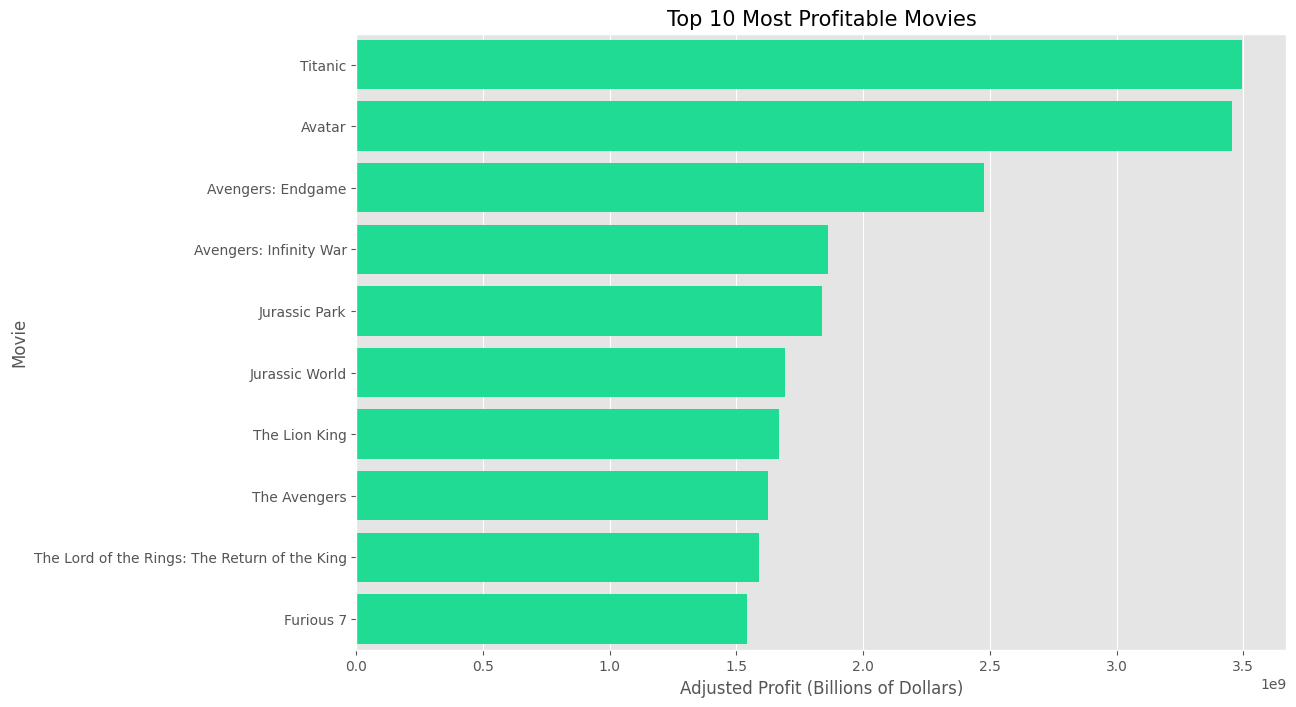

In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Adjusted_Profit', y='Movie', data=profitable_ranked_df.head(10), color='mediumspringgreen')
plt.xlabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.ylabel('Movie', fontsize=12)
plt.title('Top 10 Most Profitable Movies', fontsize=15)
plt.show()

# **Scatter Plot of Budget vs. Profit:**

* This scatter plot shows the relationship between the adjusted budget and adjusted profit for the profitable movies.
* The sns.scatterplot() function is used to create the scatter plot.
* The x-axis represents the adjusted budget in millions of dollars, and the y-axis represents the adjusted profit in billions of dollars.
* The data parameter is set to profitable_ranked_df to plot the data from the dataframe.
* The color of the scatter points is set to 'mediumspringgreen' for a consistent color scheme.

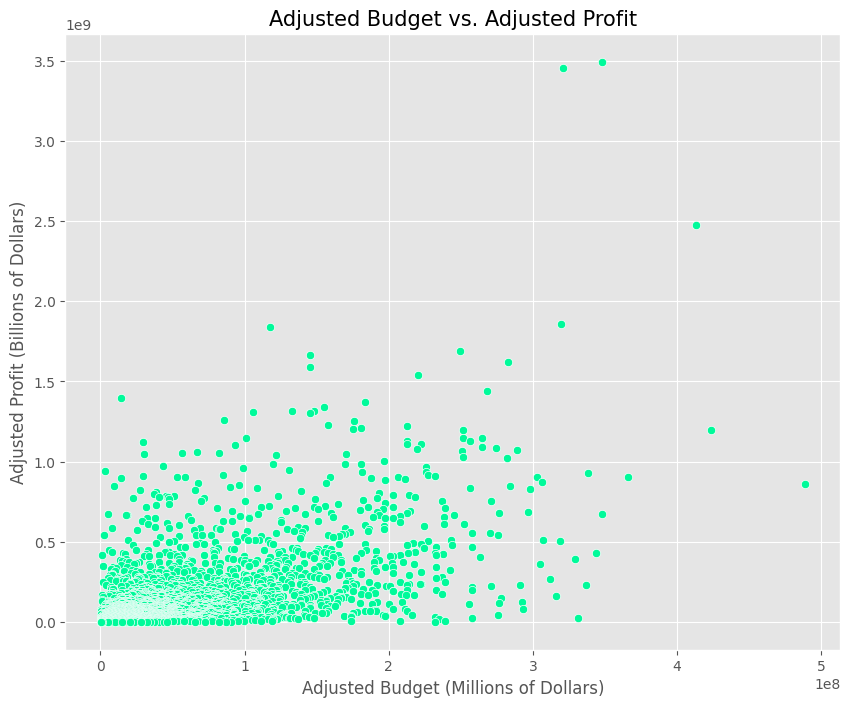

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Adjusted_Budget', y='Adjusted_Profit', data=profitable_ranked_df, color='mediumspringgreen')
plt.xlabel('Adjusted Budget (Millions of Dollars)', fontsize=12)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.title('Adjusted Budget vs. Adjusted Profit', fontsize=15)
plt.show()

# **Profit Margin Distribution:**

* This visualization presents the distribution of profit margins for the profitable movies.
* The sns.histplot() function is used to create a histogram of the profit margin values.
* The profit margin values are taken from the 'Profit_Margin' column of the profitable_ranked_df dataframe.
* The number of bins is set to 10 for a clear representation of the distribution.
* The kde=True parameter adds a kernel density estimation line to the histogram.

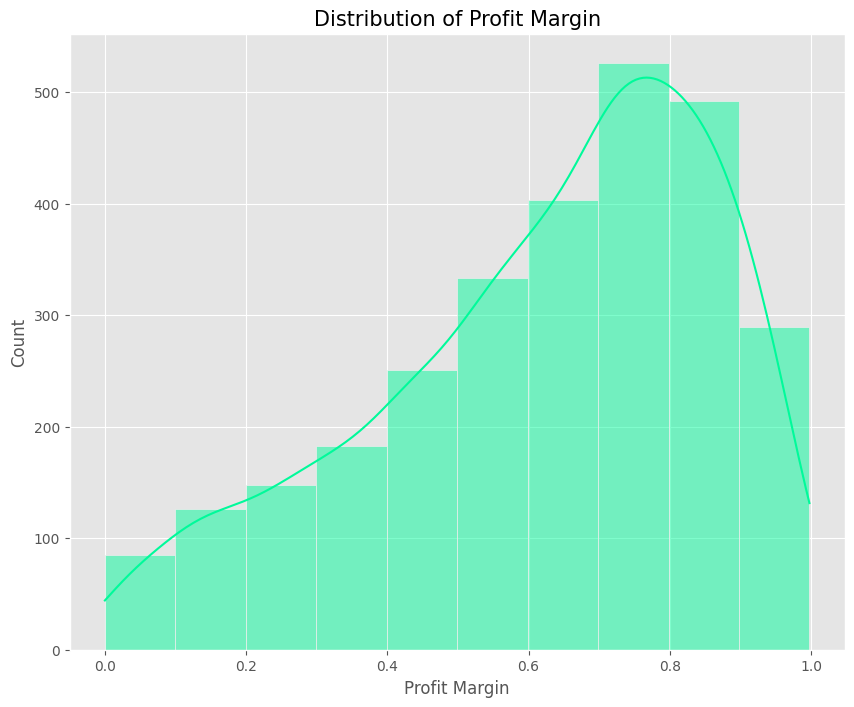

In [18]:
plt.figure(figsize=(10, 8))
sns.histplot(profitable_ranked_df['Profit_Margin'], bins=10, kde=True, color='mediumspringgreen')
plt.xlabel('Profit Margin', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Profit Margin', fontsize=15)
plt.show()

# **Box Plot of Profit by Genre:**

* This box plot visualizes the distribution of adjusted profit for each genre category.
* The sns.boxplot() function is used to create the box plot.
* The x-axis represents the genre categories, and the y-axis represents the adjusted profit in billions of dollars.
* The data for the plot is taken from the profitable_ranked_df dataframe.
* The rotation=45 parameter rotates the x-axis labels by 45 degrees for better readability.

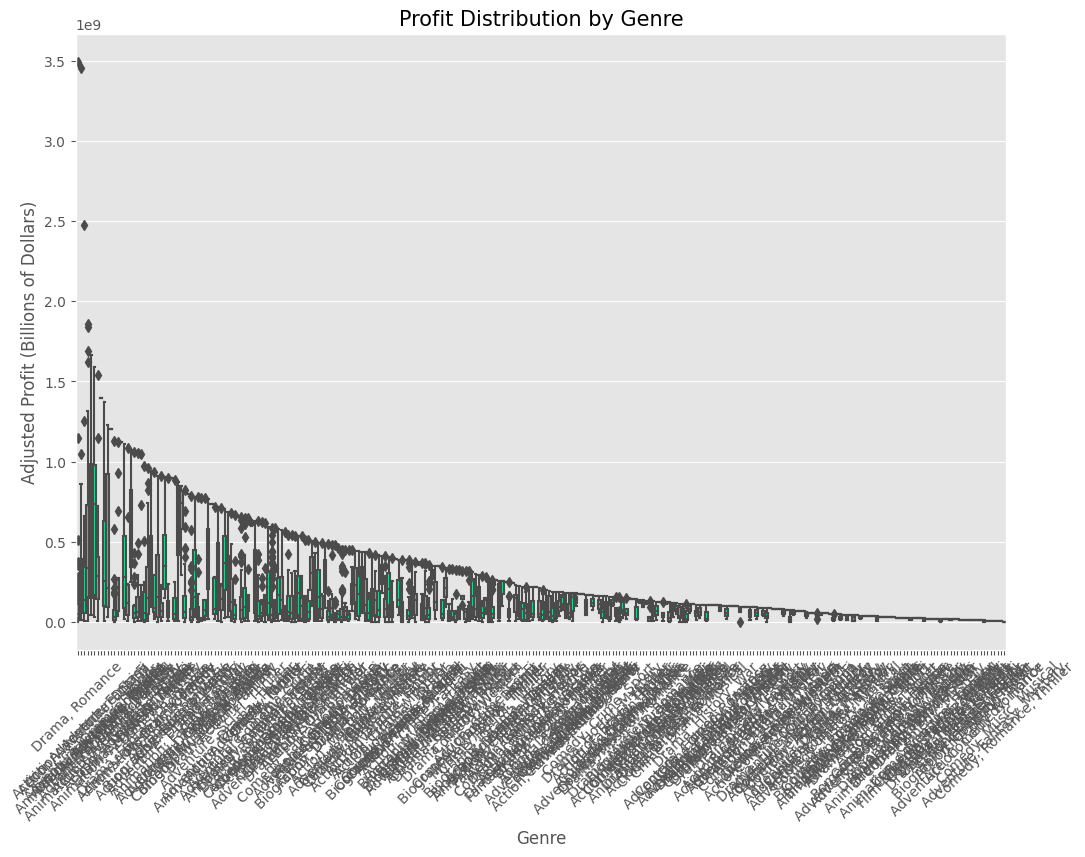

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Adjusted_Profit', data=profitable_ranked_df, color='mediumspringgreen')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.title('Profit Distribution by Genre', fontsize=15)
plt.xticks(rotation=45)
plt.show()


In conclusion, the analysis of the film industry revealed that movies such as Titanic, Avatar, and Avengers: Endgame have been highly profitable, generating billions of dollars in adjusted profit. This highlights the significance of creating compelling and engaging movies that capture the attention of audiences.

The analysis also emphasized the importance of considering inflation when evaluating movie budgets and profits. Adjusting for inflation provides a more accurate understanding of a movie's financial performance over time.

Overall, the findings suggest that success in the film industry requires a combination of factors, including creative storytelling, high production quality, effective marketing, and a strong understanding of audience preferences. Companies entering the industry should conduct thorough research, collaborate with talented filmmakers, and stay updated with industry trends to maximize their chances of achieving profitability.

# Movie genres are most commonly produced and does quantity equate to higher net profits

In [20]:
# Create a genre table that separates each value in the genre column in their own rows
imdb_budgets_df['Genre'] = imdb_budgets_df['Genre'].str.split(', ')
imdb_budgets_df1 = imdb_budgets_df['Genre'].apply(pd.Series)
imdb_budgets_df2 = pd.merge(imdb_budgets_df, imdb_budgets_df1, right_index=True, left_index=True)
imdb_budgets_df3 = imdb_budgets_df2.drop(['Genre'], axis=1)
genre_budgets_df = imdb_budgets_df3.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2], var_name='X')
genre_budgets_df = pd.merge(genre_budgets_df, imdb_budgets_df)
genre_budgets_df = genre_budgets_df.drop(['Genre', 'X'], axis=1)
genre_budgets_df = genre_budgets_df.drop_duplicates()
genre_budgets_df = genre_budgets_df.rename(columns={'value': 'Genre'})
genre_budgets_df = genre_budgets_df.dropna()


In [21]:
# Do a count of all movies grouped by genre
m_by_genre = genre_budgets_df.groupby('Genre', as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)


In [22]:
# Once again group the movies by genre, showing the average net profit and profit margin for each
p_by_genre = genre_budgets_df.groupby('Genre', as_index=False)[['Adjusted_Profit', 'Profit_Margin']].median().sort_values(by='Adjusted_Profit', ascending=False)


In [23]:
# Visualizations
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

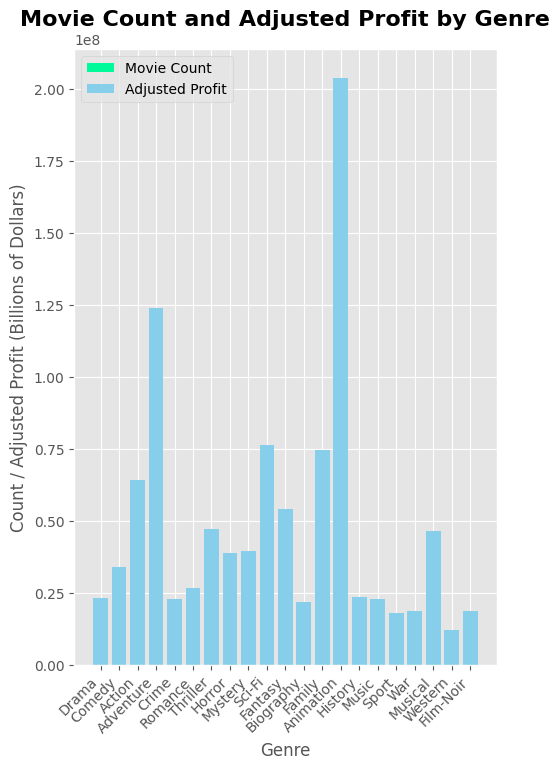

In [24]:
# Stacked Bar Chart - Comparing Movie Count and Adjusted Profit by Genre
plt.subplot(1, 2, 1)
plt.bar(m_by_genre['Genre'], m_by_genre['Movie'], color='mediumspringgreen', label='Movie Count')
plt.bar(p_by_genre['Genre'], p_by_genre['Adjusted_Profit'], color='skyblue', label='Adjusted Profit')
plt.xlabel('Genre', fontdict={'fontsize': 12})
plt.ylabel('Count / Adjusted Profit (Billions of Dollars)', fontdict={'fontsize': 12})
plt.title('Movie Count and Adjusted Profit by Genre', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend()


(-1.1547514049348067,
 1.1549871877093576,
 -1.1548666999986967,
 1.1549935552017894)

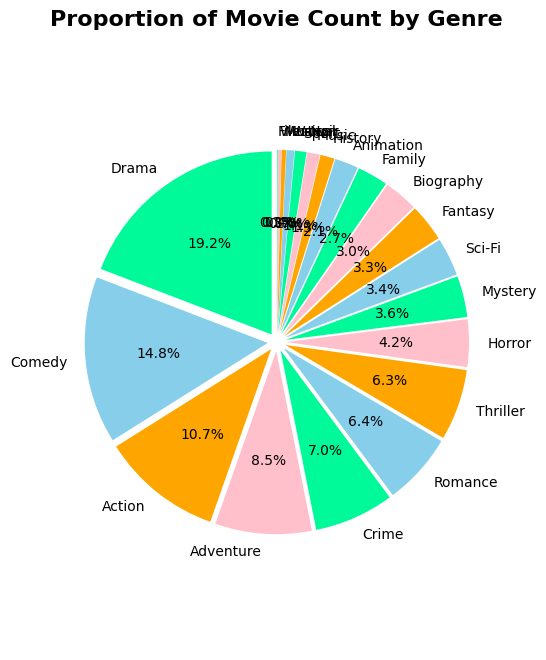

In [25]:
# Donut Chart - Proportion of Movie Count by Genre
plt.subplot(1, 2, 2)
colors = ['mediumspringgreen', 'skyblue', 'orange', 'pink']
explode = [0.05] * len(m_by_genre)
plt.pie(m_by_genre['Movie'], labels=m_by_genre['Genre'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Movie Count by Genre', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.axis('equal')

We can see that drama, comedy, and action dominate the quantity of movie genres but does this necessarily mean these are the most profitable genres? In order to determine this we will once again group each genre but this time we are going to take a look at the average net profit for each.

In [26]:
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

In [27]:
p_by_genre

,Genre,Adjusted_Profit,Profit_Margin
2,Animation,203606574.36,0.68
1,Adventure,123795016.96,0.61
16,Sci-Fi,76199115.79,0.60
7,Family,74621544.29,0.58
0,Action,64332532.19,0.52
8,Fantasy,54057582.24,0.54
18,Thriller,47338952.53,0.60
13,Musical,46631897.60,0.65
14,Mystery,39634323.82,0.61
11,Horror,38963349.12,0.67


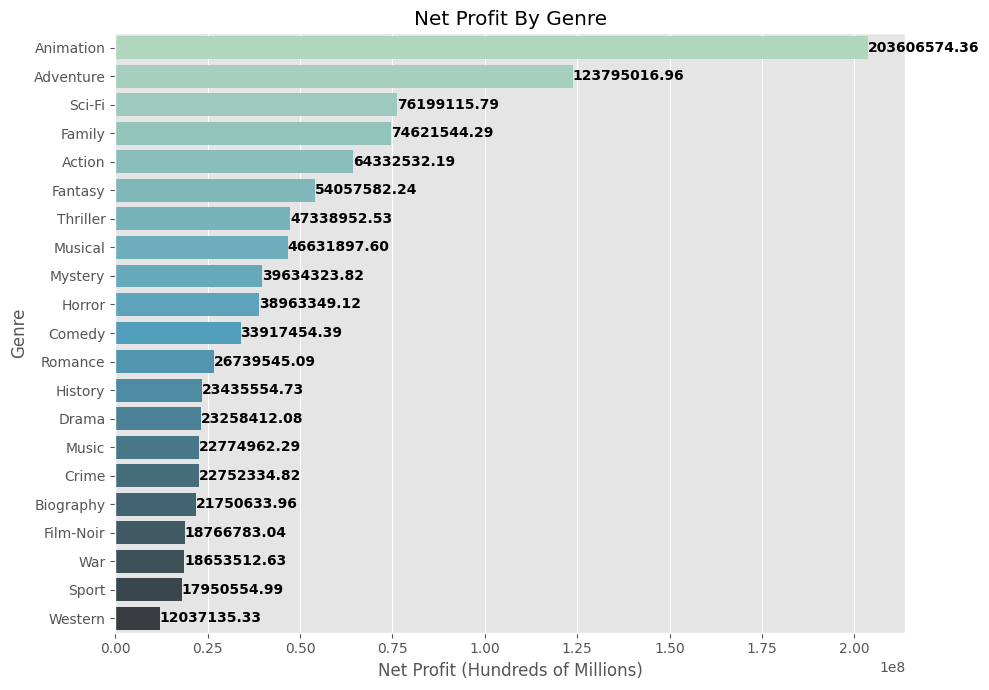

In [28]:
plt.figure(figsize=(10, 7))
sns.barplot(y=p_by_genre['Genre'], x=p_by_genre['Adjusted_Profit'], palette='GnBu_d')
plt.xlabel('Net Profit (Hundreds of Millions)')
plt.ylabel('Genre')
plt.title('Net Profit By Genre')

# Add data labels to the bars
for i, v in enumerate(p_by_genre['Adjusted_Profit']):
    plt.text(v + 100, i, f'{v:.2f}', color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('NetProfitGenre', dpi=300)
plt.show()


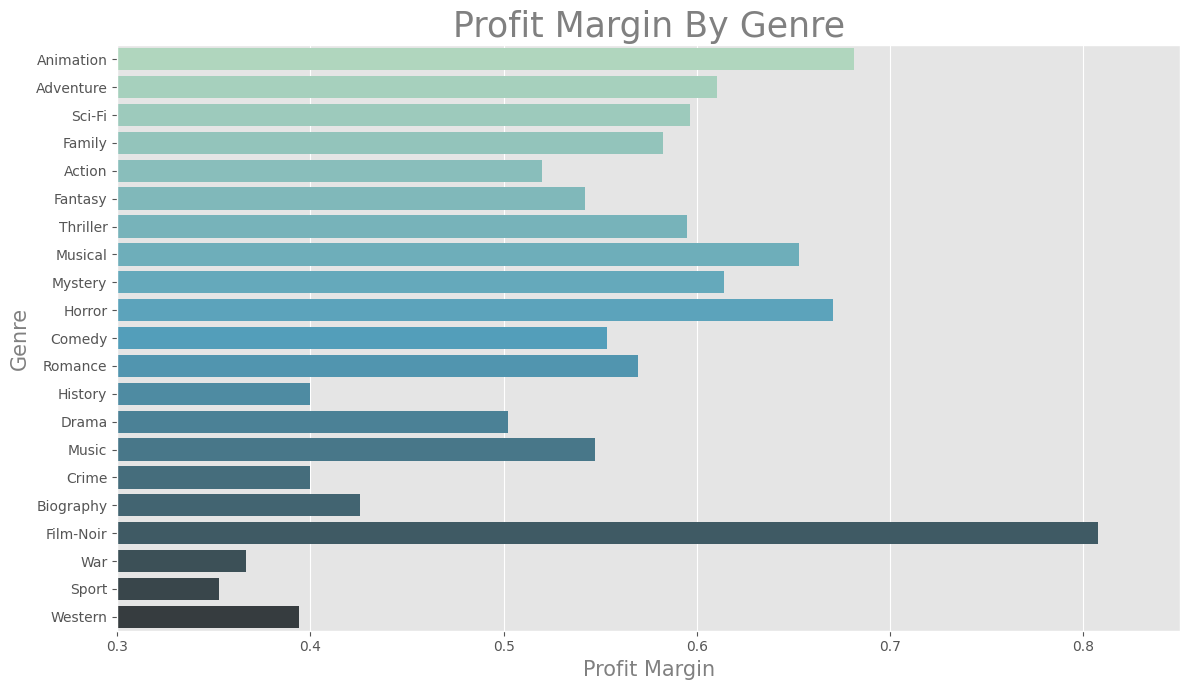

In [29]:
plt.figure(figsize=(12, 7))
sns.barplot(x=p_by_genre['Profit_Margin'], y=p_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Profit Margin', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Genre', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '15'})
plt.title('Profit Margin By Genre', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '25'})
plt.xlim(0.3, 0.85)
plt.tight_layout()
plt.savefig('ProfitMarginGenre', dpi=300)
plt.show()


Interesting, although they are not the most commonly released genres; animation, adventure, and sci-fi typically have the most success in terms of median net profit. We can also see that Animation has a desirable profit margin along with horror and musicals. Note: although Film Noir leads with a .8+ profit margin this is based on 6 movies and has to be disregarded due to the small sample size.

Lastly, of what percentage of the total net profit from all genres does each genre account?

In [30]:
#Grouped by genre, find the percent total of the net profit for each.
per_by_genre = genre_budgets_df.groupby(['Genre'],  as_index=False)['Adjusted_Profit'].sum().sort_values(by='Adjusted_Profit', ascending=False)
per_by_genre['Percent Total of Net Profit'] = (per_by_genre['Adjusted_Profit']/per_by_genre['Adjusted_Profit'].sum()*100).round(2)
per_by_genre

,Genre,Adjusted_Profit,Percent Total of Net Profit
1,Adventure,217335741708.40,18.07
0,Action,178930045524.32,14.88
4,Comedy,151922895671.69,12.63
6,Drama,144990041873.71,12.05
16,Sci-Fi,70465612908.78,5.86
2,Animation,68720987812.40,5.71
18,Thriller,65442236225.98,5.44
8,Fantasy,54797139085.80,4.56
15,Romance,50510744180.92,4.20
7,Family,46040638020.14,3.83


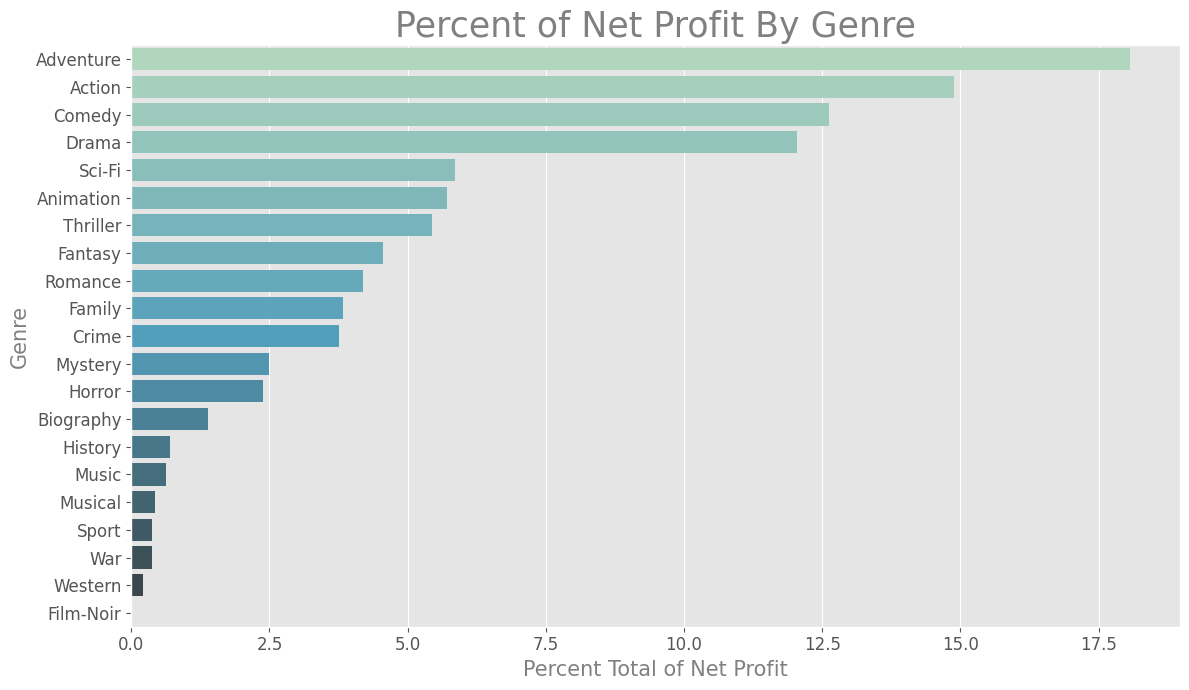

In [31]:
plt.figure(figsize=(12, 7))
sns.barplot(x=per_by_genre['Percent Total of Net Profit'], y=per_by_genre['Genre'], palette='GnBu_d')
plt.xlabel('Percent Total of Net Profit', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Genre', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '15'})
plt.title('Percent of Net Profit By Genre', fontdict={'fontname': 'Sans Serif', 'color': 'gray', 'fontsize': '25'})
plt.xticks(fontname='Sans Serif', fontsize=12)
plt.yticks(fontname='Sans Serif', fontsize=12)
plt.tight_layout()
plt.savefig('PercentProfitGenre', dpi=300)
plt.show()


Now we can see that adventure, action, comedy and drama make up the lionshare of the overall net profits from all movies. However, from our recent observations we know there are also major opportunities in the animation and sci-fi markets due to lower saturation but high average net profits. We will soon determine which genres are most successful during which months.

**Question 2 Conclusion**: We recommend that our Company should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.

# The best time of the year to release a movie

In [32]:
#Convert the Release Date field to type datetime.
imdb_budgets_df['Release Date'] = pd.to_datetime(imdb_budgets_df['Release Date'])

#Add a new column called month, displaying only the month from the release date.
dateData =  [x.strftime('%B') for x in imdb_budgets_df['Release Date']]
imdb_budgets_df['Month'] = dateData

#Count the total number of movies and group by month.
m_by_month = imdb_budgets_df.groupby(['Month'], as_index=False)['Movie'].count().sort_values(by='Movie', ascending=False)
m_by_month

,Month,Movie
2,December,452
10,October,424
9,November,366
11,September,358
1,August,346
6,June,327
5,July,296
7,March,270
8,May,241
0,April,238


Let's first start by determing which months see the most movie releases.

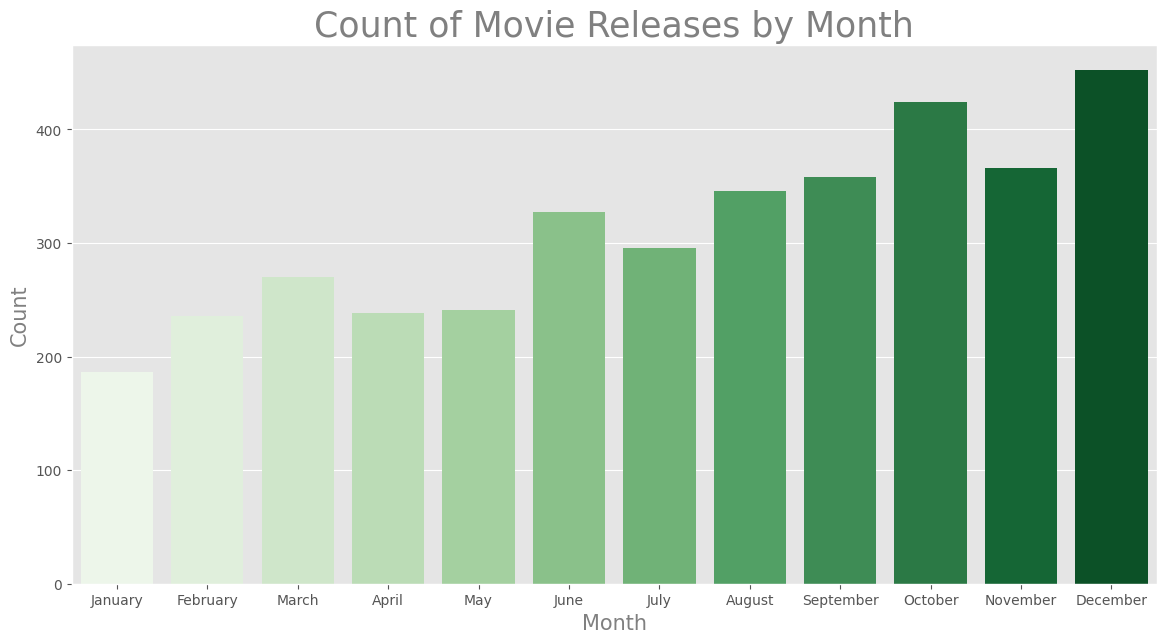

In [33]:
# Plot the count of movie releases by month
plt.figure(figsize=(14, 7))
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
ax7 = sns.countplot(x=imdb_budgets_df['Month'], palette='Greens',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontdict={'fontname': 'DejaVu Sans', 'color': 'gray', 'fontsize': '15'})
plt.ylabel('Count', fontdict={'fontname': 'DejaVu Sans', 'color': 'gray', 'fontsize': '15'})
plt.title('Count of Movie Releases by Month', fontdict={'fontname': 'DejaVu Sans', 'color': 'gray', 'fontsize': '25'})
plt.savefig('CountbyMonth', dpi=300)


As you can see Decemeber and October lead the way in terms of sheer quantity of movies but does this suggest a higher level of profitability? Next we will look into the average net income by movie for each month.

In [34]:
# Group the movies by month, showing the average net profit for each
p_by_month = imdb_budgets_df.groupby('Month', as_index=False)['Adjusted_Profit'].median().sort_values(by='Adjusted_Profit', ascending=False)


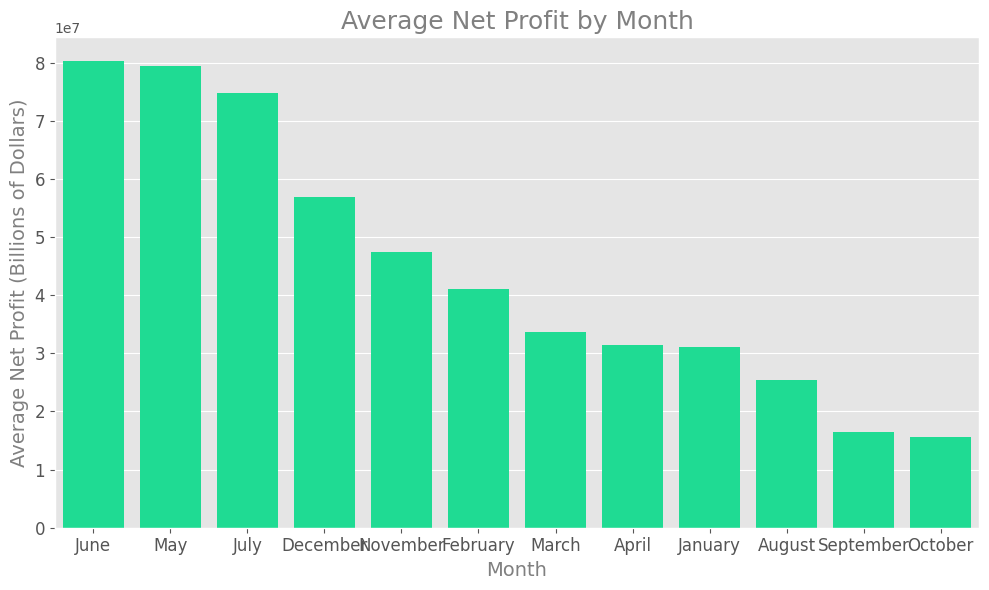

In [35]:
# Plot the average net profit by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Adjusted_Profit', data=p_by_month, color='mediumspringgreen')
plt.xlabel('Month', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.ylabel('Average Net Profit (Billions of Dollars)', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.title('Average Net Profit by Month', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 18})
plt.xticks(fontname='sans-serif', fontsize=12)
plt.yticks(fontname='sans-serif', fontsize=12)
plt.tight_layout()
plt.savefig('AverageNetProfitByMonth', dpi=300)
plt.show()

Interestingly, May, June and July shoot to the top in terms of both median net profit and profit margin. It appears that the summer months tend to result in greater success, perhaps as a result of an influx of children and their parents during summer break. Now as previously mentioned, let's dig a little further and see which genre tends to do the best in which month.

In [36]:
#Convert the Release Date field to type datetime
#Add a new column called month, displaying only the month from the release date.
genre_budgets_df['Release Date'] = pd.to_datetime(genre_budgets_df['Release Date'])
genreDate =  [x.strftime('%B') for x in genre_budgets_df['Release Date']]
genre_budgets_df['Month'] = genreDate

In [37]:
#Create a new table called month_genre consisting of Genre, Month, Net Profit, and Release Date
month_genre = genre_budgets_df[['Genre', 'Month', 'Adjusted_Profit', 'Release Date']]
#Group by Genre and Month, displaying the average Net Profit for each combination.
month_genre = month_genre.groupby(['Genre', 'Month'], as_index=False)['Adjusted_Profit'].mean().sort_values(by='Adjusted_Profit', ascending=False)

In [38]:
#Slice the top six most profitable genres from above.
Adventure_df = month_genre.loc[month_genre['Genre'].str.contains('Adventure')]
Action_df = month_genre.loc[month_genre['Genre'].str.contains('Action')]
Comedy_df = month_genre.loc[month_genre['Genre'].str.contains('Comedy')]
Drama_df = month_genre.loc[month_genre['Genre'].str.contains('Drama')]
Scifi_df = month_genre.loc[month_genre['Genre'].str.contains('Sci-Fi')]
Animation_df = month_genre.loc[month_genre['Genre'].str.contains('Animation')]

In [39]:
#Concatenate the six new tables into one new table.
genre_concat = [Adventure_df, Action_df, Comedy_df, Drama_df, Scifi_df, Animation_df]
month_genre_df = pd.concat(genre_concat)

In [40]:
#Create a table of the months in order.
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
#Create a pivot table of month_genre_df, use the month_in_order table to reindex the pivot table.
month_genre_pivoted = month_genre_df.pivot(index='Month', columns='Genre', values='Adjusted_Profit').reindex(months_in_order)

In [41]:
month_genre_pivoted

Genre,Action,Adventure,Animation,Comedy,Drama,Sci-Fi
Month,,,,,,
January,67911226.86,101480251.68,254304586.21,70321717.64,43539017.01,86131136.28
February,107741220.58,149172991.22,273699863.40,78129901.96,63807537.49,123463145.04
March,127548996.11,200474749.59,240295152.35,81411129.63,52348133.09,171335731.24
April,259392394.58,371426341.09,135514583.52,50050513.61,77199294.63,400992743.36
May,300431780.23,376946029.72,587476204.76,187839907.64,96590740.22,381838680.03
June,265101499.32,392963586.66,587763663.68,175416615.42,112382070.55,366873462.47
July,257293527.76,280812330.30,325184250.83,140927144.14,119198995.62,262513716.23
August,78993517.46,81128041.19,108115881.94,52702618.10,65637106.34,80812011.13
September,52980175.19,93388465.69,153847514.52,53288686.20,40194497.00,110804792.63


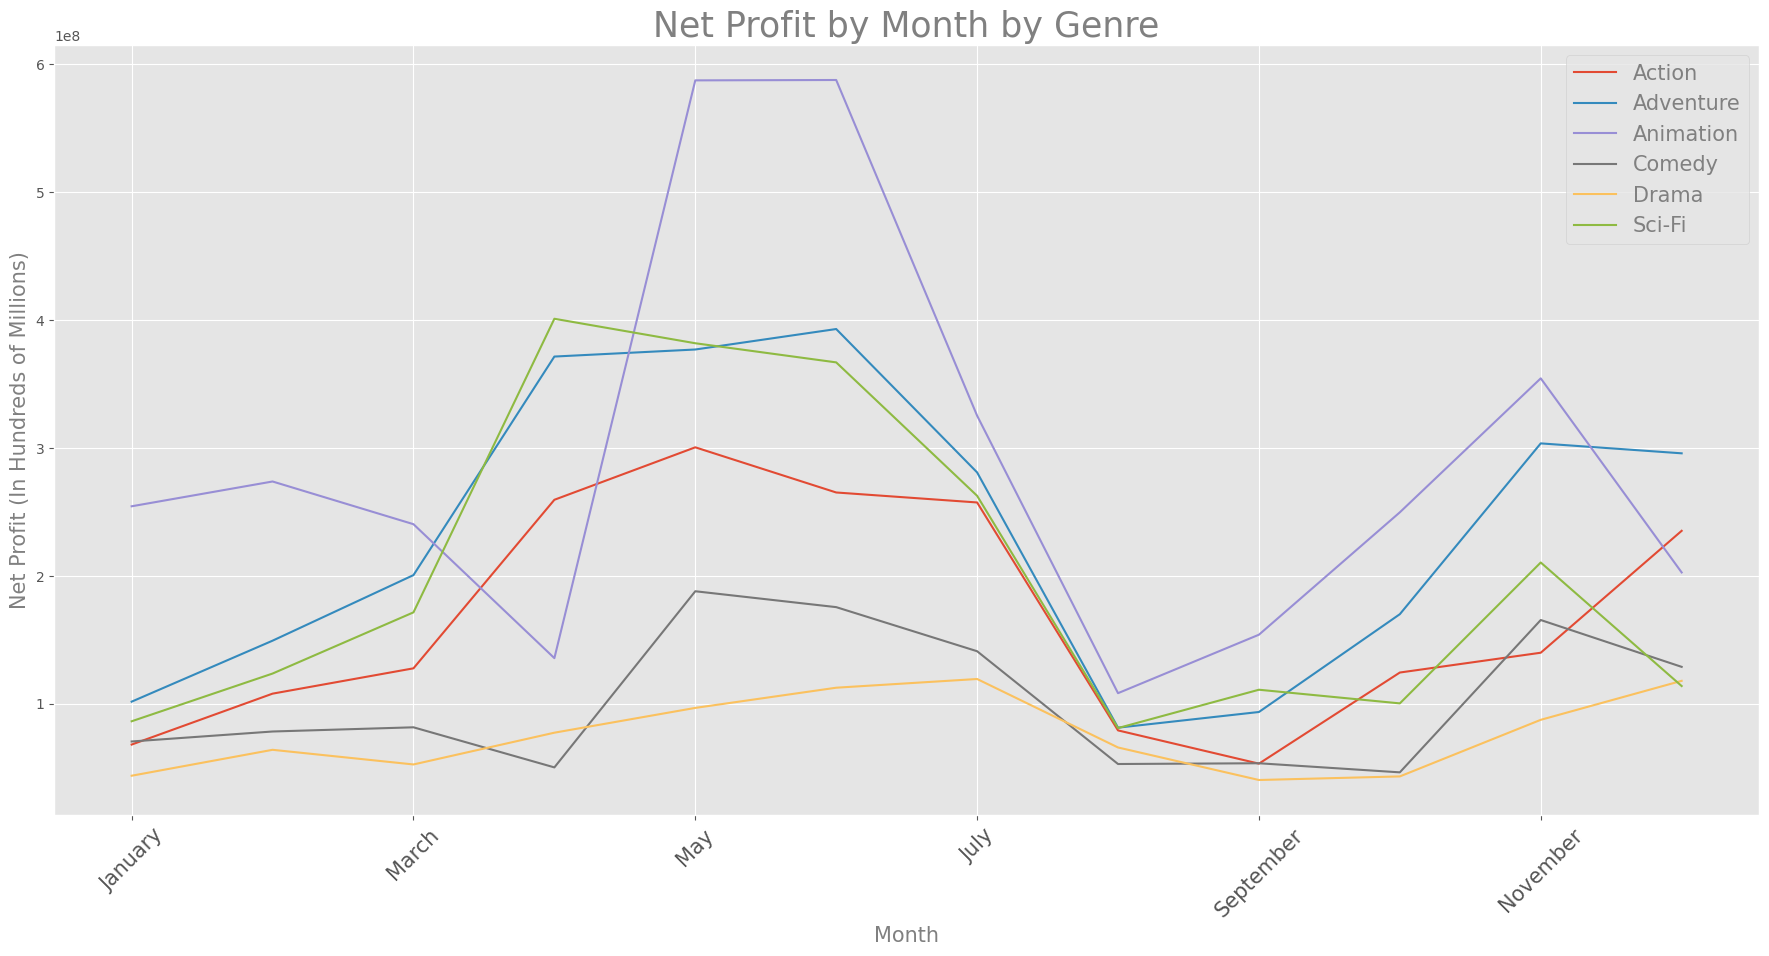

In [42]:
# Visualize the top 6 most profitable genres by month
ax10 = month_genre_pivoted.plot(kind='line', figsize=(22, 10), rot=0)
plt.legend(labelcolor='grey', loc='best', prop={'size': 15})
plt.xlabel('Month', fontdict={'fontname': 'Sans-serif', 'color': 'gray', 'fontsize': 15})
plt.ylabel('Net Profit (In Hundreds of Millions)', fontdict={'fontname': 'Sans-serif', 'color': 'gray', 'fontsize': 15})
plt.title('Net Profit by Month by Genre', fontdict={'fontname': 'Sans-serif', 'color': 'gray', 'fontsize': 25})
plt.xticks(fontsize=15, rotation=45)
plt.savefig('ProfitbyMonthbyGenre', dpi=300)

We can see that each genre follows the same basic pattern, with the summer months proving to be the most profitable time to release a movie. Some further analysis shows that releasing an animation movie in particular during the summer months will have the greatest potential for high net profits. On the other hand drama, although fluctuates slightly with the months, tends to have no impact based on release date. When considering what aspects go into creating a successful movie, it's clear that one must take take into account the impact of a well timed release date.

**Question 3 Conclusion**: We recommend that our Company release the bulk of their movies, especially Animation, during the summer months. Adventure, Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.

# Now that we've got a better understanding of what attributes to a successful movie, which actors and directors tend to add the most value?

In this section we are going to take a look at the average net profit across all movies. From there we want to determine which actors and directors consistently appear in movies where the net profit substantially exceeds the average. We will represent this in a field called Value Above Replacement(VAR). To further simplify this concept; if across all movies the average net profit is 100 dollars and the average net profit of movies from 'Actor: X' is 200 dollars he/she would have a VAR of 2. This number represents X times over the average. To eliminate outliers we will look at actors who appear in 10 or more movies and directors who work in 5 or more.

In [43]:
# Adjust for inflation
actors_df['Production Budget'] = (((2020 - actors_df['Year']) * 0.0322) + 1) * actors_df['Production Budget']
actors_df['Worldwide Gross'] = (((2020 - actors_df['Year']) * 0.0322) + 1) * actors_df['Worldwide Gross']
actors_df['Domestic Gross'] = (((2020 - actors_df['Year']) * 0.0322) + 1) * actors_df['Domestic Gross']


In [44]:
# Calculate Net Profit and Profit Margin
actors_df['Net Profit'] = actors_df['Worldwide Gross'] - actors_df['Production Budget']
actors_df['Profit Margin'] = actors_df['Net Profit'] / actors_df['Worldwide Gross']


In [45]:
# Filter actors with at least 10 movies
actor_counts = actors_df['value'].value_counts()
actor_list = actor_counts[actor_counts >= 10].index.tolist()
actors_df = actors_df[actors_df['value'].isin(actor_list)]

In [46]:
# Calculate VAR (Value-Added Ratio)
actor_total = actors_df.groupby('value', as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
actor_total['VAR'] = actor_total['Net Profit'] / actor_total['Net Profit'].mean()

In [47]:
# Select the top 25 actors by VAR
top_actors = actor_total.head(25)
top_actors

,value,Net Profit,VAR
113,Ian McKellen,642641141.05,4.56
88,Emma Watson,594070330.59,4.22
48,Chris Hemsworth,550993070.74,3.91
47,Chris Evans,518397913.83,3.68
262,Robert Downey Jr.,484884995.15,3.44
82,Elijah Wood,468414890.65,3.33
227,Mike Myers,451615981.41,3.21
324,Zoe Saldana,418413981.69,2.97
205,Mark Ruffalo,418051684.80,2.97
166,Josh Hutcherson,389946768.85,2.77


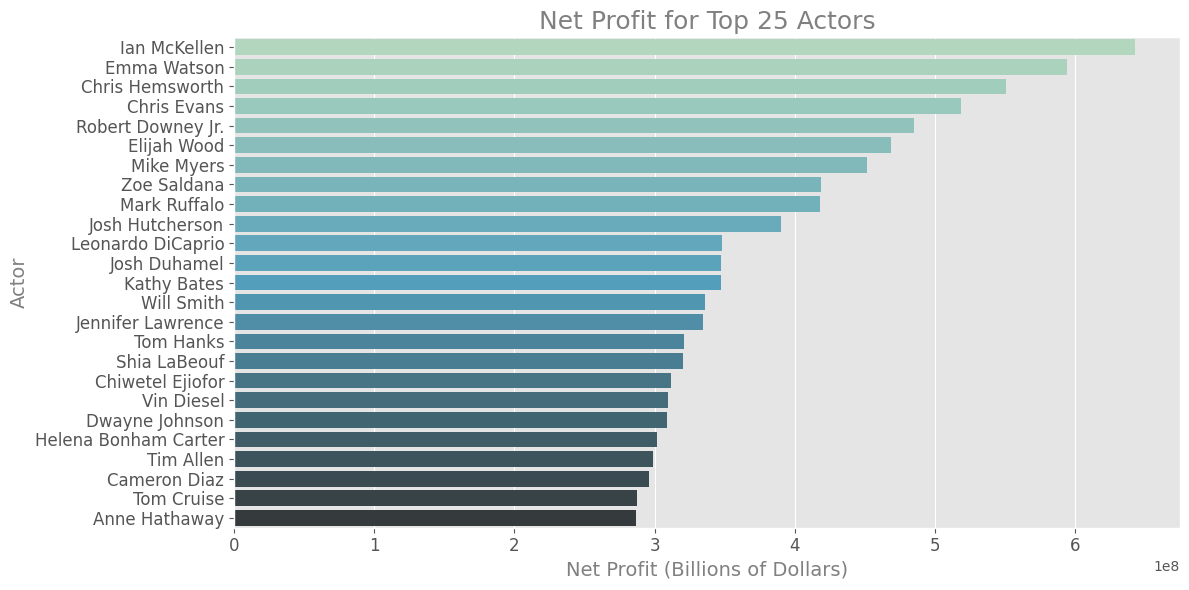

In [48]:
# Create a bar plot for net profit
plt.figure(figsize=(12, 6))
sns.barplot(x='Net Profit', y='value', data=top_actors, palette='GnBu_d')
plt.xlabel('Net Profit (Billions of Dollars)', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.ylabel('Actor', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.title('Net Profit for Top 25 Actors', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 18})
plt.xticks(fontname='sans-serif', fontsize=12)
plt.yticks(fontname='sans-serif', fontsize=12)
plt.tight_layout()
plt.savefig('NetProfitActors', dpi=300)
plt.show()

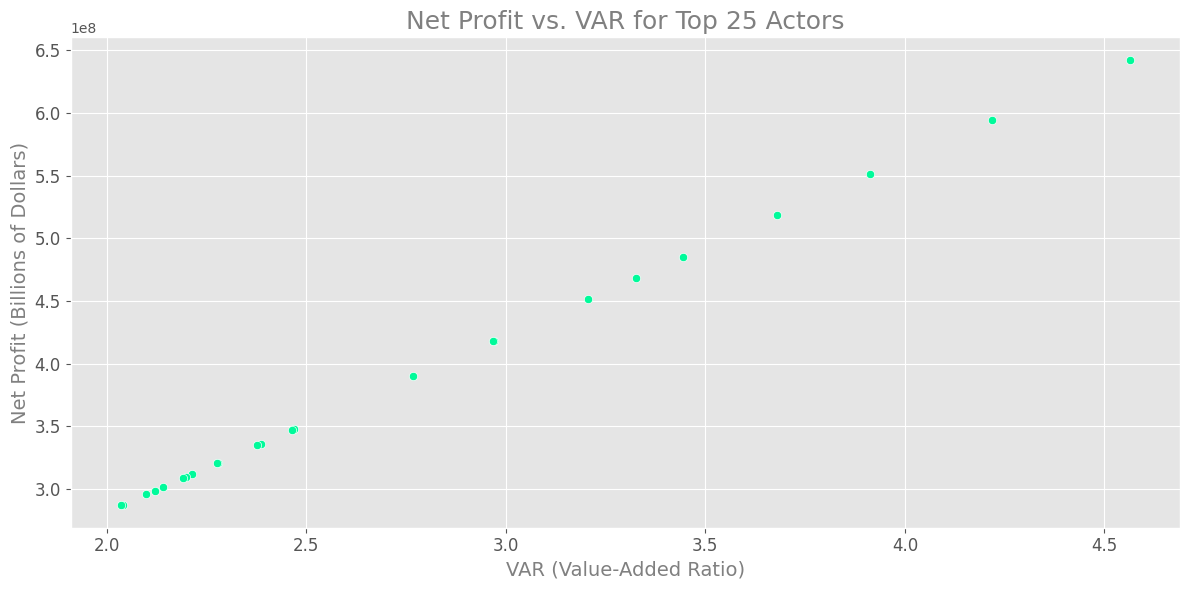

In [49]:
# Create a scatter plot for VAR and net profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='VAR', y='Net Profit', data=top_actors, color='mediumspringgreen')
plt.xlabel('VAR (Value-Added Ratio)', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.ylabel('Net Profit (Billions of Dollars)', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 14})
plt.title('Net Profit vs. VAR for Top 25 Actors', fontdict={'fontname': 'sans-serif', 'color': 'gray', 'fontsize': 18})
plt.xticks(fontname='sans-serif', fontsize=12)
plt.yticks(fontname='sans-serif', fontsize=12)
plt.tight_layout()
plt.savefig('NetProfitVARActors', dpi=300)
plt.show()

Wow, from this list we can see that all of these actors consistently appear in very profitable movies; anywhere from two times the norm to four and a half times the norm. When casting a movie this is a good short-list from where to start making calls.

In [50]:
#Adjust directors table for inflation.
directors_df['Production Budget'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Production Budget']
directors_df['Worldwide Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Worldwide Gross']
directors_df['Domestic Gross'] = (((2020-directors_df['Year'])*.0322)+1)*directors_df['Domestic Gross']

In [51]:
#Calucalte Net Profit and Profit Margin.
directors_df['Net Profit'] = directors_df['Worldwide Gross'] - directors_df['Production Budget']
directors_df['Profit Margin'] = directors_df['Net Profit'] / directors_df['Worldwide Gross']

In [52]:
#Let's filter the actors_df table to only include actors that appeared in 5 or more movies.
director_counts = directors_df['value'].value_counts()
director_list = director_counts[director_counts >= 5].index.tolist()
directors_df = directors_df[directors_df['value'].isin(director_list)]

In [53]:
#Calculate VAR, which is the average Net Profit by director divided by average Net Profit for all movies.
director_total = directors_df.groupby(['value'],  as_index=False)['Net Profit'].mean().sort_values(by='Net Profit', ascending=False)
director_total['VAR'] = (director_total['Net Profit']/actor_total['Net Profit'].mean())

In [54]:
#Create new table consisting of top 25 directors by VAR.
top_directors = director_total.head(25)
top_directors

,value,Net Profit,VAR
78,James Cameron,1244750157.55,8.84
11,Anthony Russo,1017389415.62,7.22
89,Joe Russo,1017389415.62,7.22
115,Lee Unkrich,912067911.25,6.48
148,Peter Jackson,821878024.53,5.84
50,David Yates,688135205.04,4.89
104,Jon Favreau,628704113.52,4.46
129,Michael Bay,588804626.49,4.18
96,John Lasseter,577254528.66,4.10
31,Christopher Nolan,576508914.30,4.09


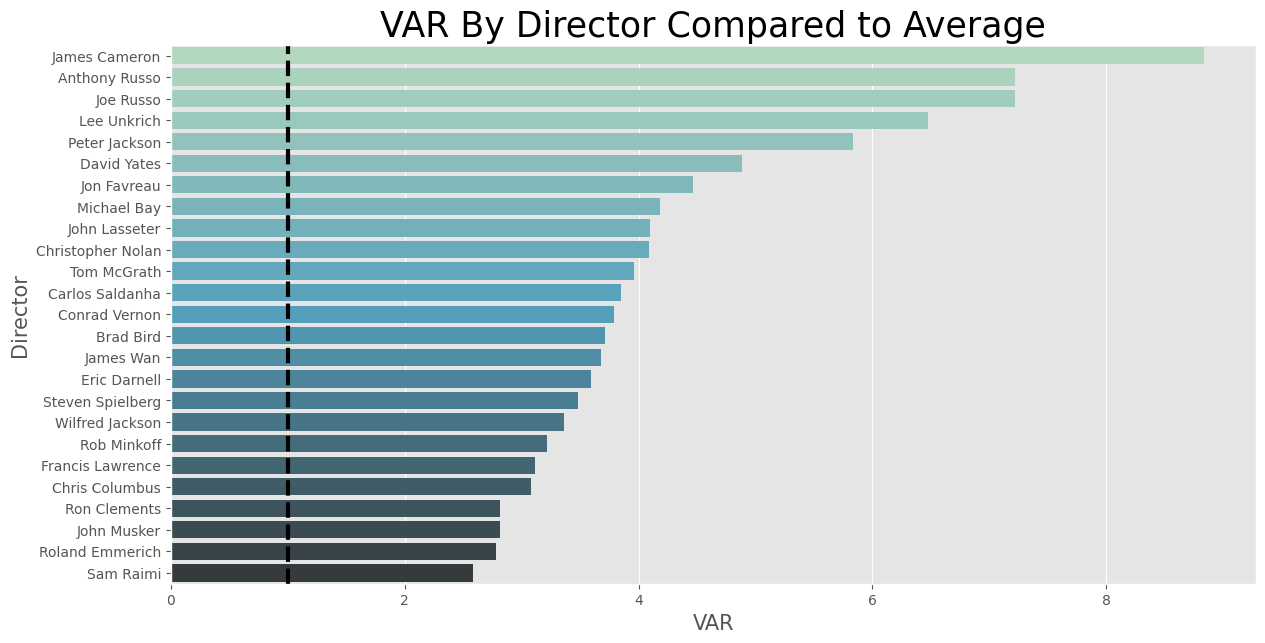

In [55]:
# Plot the VAR by director
plt.figure(figsize=(14, 7))
ax12 = sns.barplot(x=top_directors['VAR'], y=top_directors['value'], palette='GnBu_d')
plt.axvline(1, ls='--', color='black', linewidth=3)
plt.xlabel('VAR', fontsize=15)
plt.ylabel('Director', fontsize=15)
plt.title('VAR By Director Compared to Average', fontsize=25)
plt.savefig('VARDirector', dpi=300)
plt.show()

It appears that the most significant value added comes from the directors chair. James Cameron movies on average make almost nine times the amount of the average movie, this emphasizes what great leadership represents on a set. If we wanted to further investigate which actors and directors make the most impact it would be important to determine which genre of movies they appear in most.

**Conclusion**: We recommend that our Comapany focus their cast and crew search to individuals who consistently score at least 1.0 on the VAR score. We can, with a high level of confidence, conclude that these individuals will elevate the overall production.

# Conclusion
While there are many other factors that we could consider in a future analysis we feel that the following 8 conclusions will result in a successful business venture as our Comapany enters the movie industry.

1. I recommend that we should budget approximately \$82,250,000 to make a movie. This should correlate with a profit margin above 80\%.
2. I recommend that we should focus their efforts on the top 6 most profitable movie genres: Adventure, Action, Comedy, Drama, Sci-Fi and Animation. A further recommendation to focus on Sci-Fi and Animation due to less competition and a higher opportunity to profit.
3. I recommend that we release the bulk of their movies, especially Animation, during the summer months. Adventure, Drama and Comedy movies would see similar success if released in November, but the recommendation remains to focus on summer.
4. I recommend that we focus their cast and crew search to individuals who consistently score at least 1.0 on the VAR score. We can, with a high level of confidence, conclude that these individuals will elevate the overall production.
